In [60]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [61]:
IMAGE_SIZE = [224, 224]
train_path = 'C:/Users/vihan/Pneumonia/Dataset_pneumonia/chest_xray/train'
valid_path = 'C:/Users/vihan/Pneumonia/Dataset_pneumonia/chest_xray/val'

In [62]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [63]:
for layer in vgg.layers:
    layer.trainable = False

In [64]:
folders = glob('C:/Users/vihan/Pneumonia/Dataset_pneumonia/chest_xray/train/*')
x = Flatten()(vgg.output)

In [65]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary() 

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [66]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [67]:
from keras.preprocessing.image import ImageDataGenerator



In [68]:
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255)



training_set = train_datagen.flow_from_directory('C:/Users/vihan/Pneumonia/Dataset_pneumonia/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory('C:/Users/vihan/Pneumonia/Dataset_pneumonia/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [69]:
history= model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/2
522/522 [==============================] - 613s 1s/step - loss: 0.1880 - accuracy: 0.9340 - val_loss: 0.3000 - val_accuracy: 0.9151
Epoch 2/2
522/522 [==============================] - 602s 1s/step - loss: 0.1246 - accuracy: 0.9580 - val_loss: 0.3305 - val_accuracy: 0.9183


In [70]:
import tensorflow as tf
from keras.models import load_model
import pickle 

model.save('chest_xray.h5')
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model=load_model('chest_xray.h5')



In [132]:
from tensorflow.keras.preprocessing import image
img=image.load_img('C:\\Users\\vihan\\Pneumonia\\person23_virus_56.JPEG',target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
print(classes[0][0])


1/1 [==============================] - 0s 215ms/step
0.0


In [133]:

model = tf.keras.models.load_model('chest_xray.h5')


layer_dict = dict([(layer.name, layer) for layer in model.layers])

last_conv_layer = None
for layer in reversed(model.layers):
    if 'conv' in layer.name:
        last_conv_layer = layer
        break

print("Last Convolutional Layer:", last_conv_layer.name)

Last Convolutional Layer: block5_conv3


In [134]:

#Heat Map
# model = load_model('chest_xray.h5')

# Choose the target layer (final convolutional layer)
# target_layer = model.get_layer('conv_layer_name')

# # Load and preprocess a chest X-ray image
# img_path = ''
# img = image.load_img(img_path, target_size=(224, 224))
# x = image.img_to_array(img)
# x = preprocess_input(x)
# x = np.expand_dims(x, axis=0)

# # Get the prediction and gradients
# with tf.GradientTape() as tape:
#     last_conv_layer_output, predictions = model(x)
#     predicted_class = tf.argmax(predictions[0])

# grads = tape.gradient(predictions, last_conv_layer_output)
# pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
# heatmap = tf.reduce_mean(last_conv_layer_output, axis=-1)

# heatmap = heatmap - tf.reduce_min(heatmap)
# heatmap = heatmap / tf.reduce_max(heatmap)

# heatmap = heatmap * pooled_grads
# heatmap = tf.reduce_mean(heatmap, axis=-1)
# heatmap = tf.maximum(heatmap, 0)

# # Resize heatmap to match the original image size
# heatmap = tf.image.resize(heatmap, (img.shape[1], img.shape[2]))

# # Convert heatmap to numpy array
# heatmap = heatmap.numpy()

# # Apply colormap for visualization
# heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

# # Superimpose the heatmap on the original image
# superimposed_img = heatmap * 0.4 + np.array(img)

# # Display the original image with the heatmap overlay
# plt.imshow(superimposed_img)
# plt.axis('off')
# plt.show()

PNEUMONIA Positive


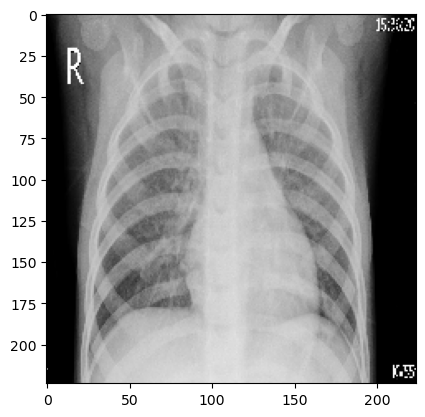

In [135]:
result=float(classes[0][0])
img=image.load_img('C:\\Users\\vihan\\Pneumonia\\person23_virus_56.JPEG',target_size=(224,224))
plt.imshow(img)
if result==0:
    print("PNEUMONIA Positive")
else:
    print("Normal Report")
    
